In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

In [4]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_INTER_PATH = os.path.join('..','data','interim') 
DATA_INTER_RAW_NAME = 'df_raw.csv'
DATA_INTER_RAW2_NAME ='df_raw2.csv'
IMG_PATH = os.path.abspath(os.path.join('..','reports', 'figures'))

In [7]:
df_raw = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_RAW_NAME))
df_raw2 = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_RAW2_NAME))

In [10]:
df_raw.head()

,credito,genero,educacao,status,idade,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,pag_prox_fatura
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
df_raw.describe()

,credito,genero,educacao,status,idade,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,pag_prox_fatura
count,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000,2.724800e+04,27248.000000,27248.000000,27248.000000,27248.000000,2.724800e+04,27248.000000,27248.000000,27248.000000,27248.000000,27248.000000
mean,167536.688197,1.602099,1.854999,1.553215,35.502422,-0.011781,-0.128230,-0.162397,-0.215025,-0.260496,-0.286296,51404.154507,49346.027305,4.720007e+04,43440.210915,40468.668159,39039.523415,5699.459960,5.923364e+03,5245.242990,4836.294444,4842.746293,5203.010606,0.222181
std,129960.435172,0.489474,0.791607,0.521313,9.259249,1.123935,1.198597,1.198695,1.170419,1.135076,1.152064,73580.542510,71073.683432,6.938371e+04,64296.217767,60679.209387,59449.414160,16739.513528,2.338672e+04,17196.576121,15728.281019,15494.180004,17724.169466,0.415720
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3655.750000,3078.500000,2.777750e+03,2400.000000,1807.750000,1287.750000,1000.000000,8.567500e+02,391.750000,300.000000,250.000000,146.500000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22711.500000,21514.000000,2.029800e+04,19145.000000,18231.500000,17222.500000,2110.000000,2.014000e+03,1812.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67502.750000,64145.250000,6.051875e+04,54867.250000,50463.250000,49406.000000,5009.250000,5.000000e+03,4541.250000,4013.250000,4060.000000,4002.250000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [24]:
df_raw['pag_prox_fatura'].value_counts()

0    21194
1     6054
Name: pag_prox_fatura, dtype: int64

In [25]:
df_raw.groupby('idade')['pag_prox_fatura'].value_counts()

idade  pag_prox_fatura
21     0                    48
       1                    14
22     0                   360
       1                   158
23     0                   599
       1                   229
24     0                   767
       1                   275
25     0                   809
       1                   275
26     0                   912
       1                   229
27     0                  1066
       1                   289
28     0                  1025
       1                   258
29     0                  1166
       1                   282
30     0                  1009
       1                   251
31     0                   905
       1                   207
32     0                   841
       1                   206
33     0                   845
       1                   193
34     0                   839
       1                   211
35     0                   807
       1                   206
36     0                   755
       1        

In [27]:
def plot_bars(df, features, n_rows, n_cols, title, figsize):
   
    fig = plt.figure(figsize=figsize)
    for i, feat in enumerate(features):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        sns.countplot(data=df, x=feat, ax=ax)
    
    fig.suptitle(title)
    fig.show()

def plot_hists(df, features, n_rows, n_cols, title, figsize):
   
    fig = plt.figure(figsize=figsize)
    for i, feat in enumerate(features):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df[feat], hist=True, bins=20, ax=ax)
    
    fig.suptitle(title)
    fig.show()

<ipython-input-27-868244833931>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


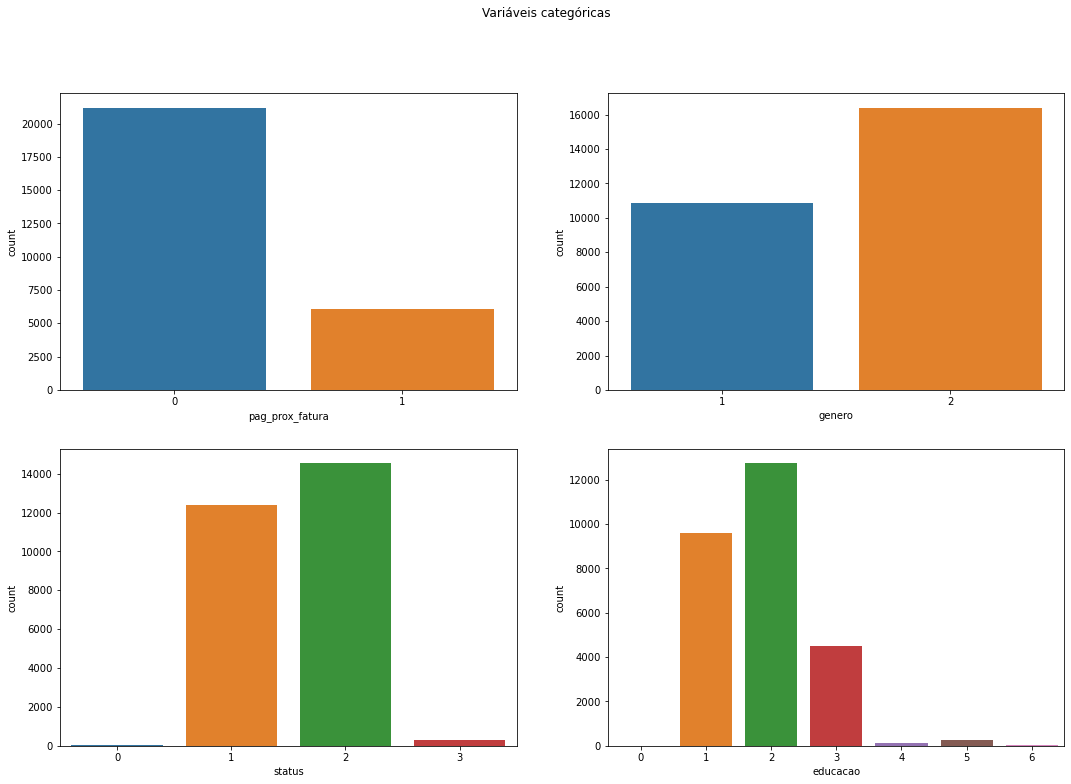

In [34]:
plot_bars(df_raw, features=['pag_prox_fatura', 'genero', 'status', 'educacao'], n_rows=2, n_cols=2,
                                          title='Variáveis categóricas', figsize=(18,12))

<ipython-input-27-868244833931>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


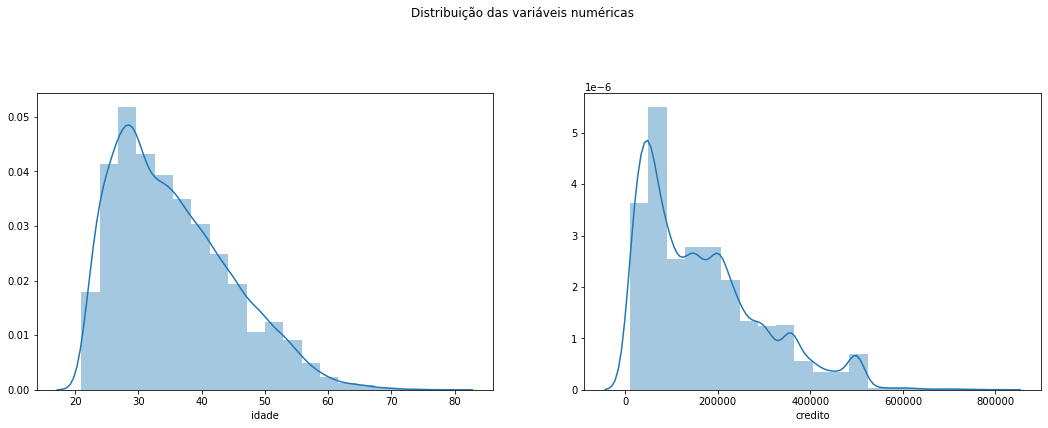

In [31]:
plot_hists(df_raw, features=['idade','credito'], n_rows=2, n_cols=2,
                            title='Distribuição das variáveis numéricas', figsize=(18,12))